</br>

# Introduction

This problem is one of the classic machine learning problem, with a multiple datasets containing information about tennis matches, players and tournements, we try to predict the winner player in the match given the minimum information.</br>
</br>
In the following notebook I will work on different ML models to answer this problem, and at the end I will present the best model with the best accuracy score.</br>
</br>
NB : I don't have the result for the test data, my objective with this exercice is to show my technical capacities wiin ML and data analisys. During the implementation of each model I will present briefly its theory also.</br>
<font size="2.8" color="#FF4500" >Hope you enjoy it</font> 

# Environement set-up 

In [79]:
# Import libraries
import numpy as np
import sklearn
import pandas as pd
from pandas.plotting import scatter_matrix
import xgboost as xgb
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model.stochastic_gradient import SGDClassifier
%matplotlib inline

In [38]:
# Import data files
data_train     = pd.read_csv('train.csv',index_col=0)
data_stats     = pd.read_csv('stats.csv',index_col=0)
data_test      = pd.read_csv('test.csv')
data_tour      = pd.read_csv('tour.csv')
data_players   = pd.read_csv('players.csv')
data_playerate = pd.read_csv('player_rates.csv',index_col=0)

In [5]:
# Import test file
data_test      = pd.read_csv('test.csv')

# Data discovery 

In [6]:
data_train.head()

,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G
0,17613,18854,8887,4,7-6(8) 3-6 10-7,2012-01-31 00:00:00
1,25192,25191,8888,4,6-3 6-2,2012-01-31 00:00:00
2,918,10828,8957,4,6-1 6-2,2012-01-31 00:00:00
3,3316,2379,8957,4,6-4 7-6(5),2012-01-31 00:00:00
4,7869,6277,8957,4,6-4 6-4,2012-01-31 00:00:00


Data train is the table containing examples to train the model, it could be modified to add new features to get better result. That what I will discover in the next line of code :D

ID1_G = player1 index (winner)</br>
ID2_G = player2 index (loser)</br>
ID_T_G = tournement index </br>
ID_R_G = round </br>
RESULT_G = match_result</br>
DATE_G = match date

</br>

In [7]:
data_stats.head()

,ID1,ID2,ID_T,ID_R,FS_1,FSOF_1,ACES_1,DF_1,UE_1,W1S_1,...,NAOF_2,TPW_2,FAST_2,A1S_2,A2S_2,RPW_1,RPWOF_1,RPW_2,RPWOF_2,MT
0,6431,7042,8961,4,46.0,70.0,19.0,3.0,NaN,40,...,NaN,70,NaN,NaN,NaN,27.0,79.0,18.0,70.0,1899-12-30 01:35:35
1,11923,4078,8961,4,40.0,70.0,8.0,1.0,NaN,31,...,NaN,73,NaN,NaN,NaN,41.0,91.0,23.0,70.0,1899-12-30 01:38:41
2,662,1621,8961,4,52.0,83.0,4.0,4.0,NaN,33,...,NaN,75,NaN,NaN,NaN,31.0,74.0,32.0,83.0,1899-12-30 01:42:36
3,7461,10320,8959,4,12.0,14.0,4.0,0.0,NaN,10,...,NaN,10,NaN,NaN,NaN,12.0,20.0,2.0,14.0,1899-12-30 00:21:11
4,12495,3996,8959,4,68.0,110.0,4.0,0.0,NaN,36,...,NaN,114,NaN,NaN,NaN,55.0,122.0,47.0,110.0,1899-12-30 02:38:00


</br>

Is the table containing the most information on each match two players had 

ID1 : L’identifiant du joueur qui a gagné le match</br>
ID2 : L’identifiant du joueur qui a perdu le match</br>
ID_T : L’identifiant du tournoi (voir tours_atp)</br>
ID_R : L’identfiant du extit{round} dans le tournoi </br>
FS_1 : Nombre de premiers services réussis par joueur 1</br>
FS_OF1 : Nombre de premiers services par joueur 1</br>
ACES_1 : Aces du joueur 1</br>
DF_1 : Double Fautes commis par joueur 1</br>
UE_1 : Unforced errors</br>
W1S_1: Nombre de points gagnés sur premier service</br>
W1SOF_1: Nombre de points joués sur premier service</br>
W2S_1: Nombre de points gagnés sur second service</br>
W2SOF_1: Nombre de points joués sur second service</br>
WIS_1 : Nombre de points gagnés en tout</br>
BP_1 : Nombre de balles de break gagnées</br>
BPOF_1 : Nombre de balles de break obtenues</br>
RPW_1 : Nombre de points gagnés</br>
RPW_OF1 : Nombre de points jouées</br>
Same features for player 2

</br>

In [8]:
data_players.head()

,ID_P,NAME_P,DATE_P,COUNTRY_P,RANK_P,PROGRESS_P,POINT_P,HARDPOINT_P,HARDTOUR_P,CLAYPOINT_P,...,CARPETPOINT_P,CARPETTOUR_P,PRIZE_P,CH_P,DR_P,DP_P,DO_P,IHARDPOINT_P,IHARDTOUR_P,ITF_ID
0,1,Gustavo Kuerten,1976-09-10 00:00:00,BRA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Marat Safin,1980-01-27 00:00:00,RUS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Andre Agassi,1970-04-29 00:00:00,USA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Pete Sampras,1971-08-12 00:00:00,USA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Magnus Norman,1976-05-30 00:00:00,SWE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The table containing information on each player

</br>

In [9]:
data_playerate.head()

,DATE_R,ID_P_R,POINT_R,POS_R
0,2012-01-02 00:00:00,5992,13630,1
1,2012-01-02 00:00:00,677,9595,2
2,2012-01-02 00:00:00,19,8170,3
3,2012-01-02 00:00:00,1075,7380,4
4,2012-01-02 00:00:00,673,4925,5


Table containing the ranking of each player per year

</br>

In [10]:
data_tour.head()

,ID_T,NAME_T,ID_C_T,DATE_T,RANK_T,LINK_T,COUNTRY_T,PRIZE_T,RATING_T,URL_T,...,SITE_T,RACE_T,ENTRY_T,SINGLES_T,DOUBLES_T,TIER_T,RESERVE_INT_T,RESERVE_CHAR_T,LIVE_T,RESULT_T
0,1,Australian Men's Hardcourt Championships - Ade...,1,1997-01-01 00:00:00,2,1600.0,AUS,$303K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Qatar Mobil Open - Doha,1,1997-01-01 00:00:00,2,1601.0,QAT,$600K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BellSouth Open - Auckland,1,1997-01-06 00:00:00,2,1603.0,NZL,$303K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Sydney International - Sydney,1,1997-01-06 00:00:00,2,1604.0,AUS,$303K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Australian Open - Melbourne,1,1997-01-13 00:00:00,4,1605.0,AUS,$3.538M,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Table containing information about each tournement

## Data pre-processing 

### Missing values

In [41]:
data_train.isnull().sum()/data_train.shape[0] * 100

ID1_G       0.0
ID2_G       0.0
ID_T_G      0.0
ID_R_G      0.0
RESULT_G    0.0
DATE_G      0.0
dtype: float64

In [42]:
data_players.isnull().sum()/data_players.shape[0] * 100

ID_P              0.000000
NAME_P            0.000000
DATE_P           51.905979
COUNTRY_P        50.790108
RANK_P           98.380188
PROGRESS_P       98.380188
POINT_P          98.380188
HARDPOINT_P      98.380188
HARDTOUR_P       98.380188
CLAYPOINT_P      98.380188
CLAYTOUR_P       98.380188
GRASSPOINT_P     98.380188
GRASSTOUR_P      98.380188
CARPETPOINT_P    98.380188
CARPETTOUR_P     98.380188
PRIZE_P          96.880962
CH_P             99.820021
DR_P             98.380188
DP_P             98.380188
DO_P             98.380188
IHARDPOINT_P     98.380188
IHARDTOUR_P      98.380188
ITF_ID           71.912458
dtype: float64

As it is shown for the table players most features are Null, and we could not use any of the technique to complete them

In [60]:
data_playerate.isnull().sum()/data_playerate.shape[0] * 100

DATE_R     0.0
ID_P_R     0.0
POINT_R    0.0
POS_R      0.0
dtype: float64

In [61]:
data_stats.isnull().sum()/data_stats.shape[0] * 100

ID1         0.000000
ID2         0.000000
ID_T        0.000000
ID_R        0.000000
FS_1        0.002645
FSOF_1      0.002645
ACES_1      0.942984
DF_1        0.293608
UE_1       92.899181
W1S_1       0.000000
W1SOF_1     0.000000
W2S_1       0.001323
W2SOF_1     0.001323
WIS_1      92.878020
BP_1        0.023806
BPOF_1      0.023806
NA_1       96.396027
NAOF_1     96.396027
TPW_1       0.000000
FAST_1     97.733134
A1S_1      97.776779
A2S_1      97.776779
FS_2        0.002645
FSOF_2      0.002645
ACES_2      0.945630
DF_2        0.294931
UE_2       92.899181
W1S_2       0.000000
W1SOF_2     0.000000
W2S_2       0.001323
W2SOF_2     0.001323
WIS_2      92.878020
BP_2        0.034387
BPOF_2      0.027774
NA_2       96.396027
NAOF_2     96.397350
TPW_2       0.000000
FAST_2     97.733134
A1S_2      97.776779
A2S_2      97.776779
RPW_1       0.641441
RPWOF_1     0.641441
RPW_2       0.641441
RPWOF_2     0.641441
MT          0.470831
dtype: float64

Some columns contains lot of missing values, I will drop them since I could not replace them with certain values (mean, median)</br>
I should mention that during the next step, "data preprocessing", I will complete the missing values, drop certain columns and make opperations between columns having a certain correlation

In [62]:
data_tour.isnull().sum()/data_tour.shape[0] * 100

ID_T                0.000000
NAME_T              0.000000
ID_C_T              0.000000
DATE_T              0.000000
RANK_T              0.000000
LINK_T             64.675678
COUNTRY_T           0.000000
PRIZE_T            10.820811
RATING_T           93.324775
URL_T              80.125349
LATITUDE_T         58.038209
LONGITUDE_T        58.038209
SITE_T             83.478064
RACE_T             85.026051
ENTRY_T            85.010949
SINGLES_T          94.193159
DOUBLES_T          94.200710
TIER_T             89.262252
RESERVE_INT_T     100.000000
RESERVE_CHAR_T     63.641169
LIVE_T            100.000000
RESULT_T           98.648343
dtype: float64

## Filling missing values 

The first data preprocessing is to combine columns with hight correlation, without any calculations, we can understaind that for the number of winning point during the first serve is correlated to the number of first serve W1S_1 to W1SOF_1 (same for player2), so I will combine this two columns in one column reflecting the rate of winning first serve </br>
The same idea goes for many columns : </br>
W1S_1 and W1SOF_1</br>
W2S_1 and W2SOF_1</br>
FS_1 and FS_OF_1</br>
BP_1 and BPOF_1</br>
RPW_1 and RPW_OF1</br>
and the same thing goes for player 2 </br>
Then I will drop thes columns

In [39]:
tuples = [('W1SR_1', 'W1S_1', 'W1SOF_1'),
          ('W2SR_1', 'W2S_1', 'W2SOF_1'),
          ('FSR_1', 'FS_1', 'FSOF_1'),
          ('BPR_1', 'BP_1', 'BPOF_1'),
          ('RPWR_1', 'RPW_1', 'RPWOF_1'),
          ('W1SR_2', 'W1S_2', 'W1SOF_2'),
          ('W2SR_2', 'W2S_2', 'W2SOF_2'),
          ('FSR_2', 'FS_2', 'FSOF_2'),
          ('BPR_2', 'BP_2', 'BPOF_2'),
          ('RPWR_2', 'RPW_2', 'RPWOF_2'),
]
for tup in tuples:
    data_stats[tup[0]] = data_stats[tup[1]] / data_stats[tup[2]]

In [40]:
data_stats.drop(['W1S_1', 'W1SOF_1', 'W2S_1', 'W2SOF_1', 'FS_1', 'FSOF_1', 'BP_1', 'BPOF_1', 'RPW_1', 'RPWOF_1', 
                 'W1S_2', 'W1SOF_2', 'W2S_2', 'W2SOF_2', 'FS_2', 'FSOF_2', 'BP_2', 'BPOF_2', 'RPW_2', 'RPWOF_2'],
               inplace = True, axis = 1)

In [42]:
data_stats.drop(['UE_1', 'WIS_1', 'NA_1', 'NAOF_1', 'A1S_1', 'A2S_1', 'FAST_1',
                 'UE_2', 'WIS_2', 'NA_2', 'NAOF_2', 'A1S_2', 'A2S_2', 'FAST_2'],
               inplace = True, axis = 1)

In [43]:
data_stats.isnull().sum()/data_stats.shape[0] * 100

ID1        0.000000
ID2        0.000000
ID_T       0.000000
ID_R       0.000000
ACES_1     0.942984
DF_1       0.293608
TPW_1      0.000000
ACES_2     0.945630
DF_2       0.294931
TPW_2      0.000000
MT         0.470831
W1SR_1     0.014548
W2SR_1     0.025129
FSR_1      0.014548
BPR_1      0.220867
RPWR_1     0.649376
W1SR_2     0.010580
W2SR_2     0.026451
FSR_2      0.010580
BPR_2     10.091124
RPWR_2     0.653344
dtype: float64

## Data format

In [100]:
# Formattage des colonnes dates
def date_tras(df,name):
    df[name] = pd.to_datetime(df[name])

In [101]:
date_tras(data_train,'DATE_G')
date_tras(data_stats,'MT')
date_tras(data_playerate,'DATE_R')

# Some stats 

In [12]:
print("The number of training examples: {} \nThe number of training features: {}".format(data_train.shape[0],data_train.shape[1]))

The number of training examples: 73366 
The number of training features: 6


In [15]:
print("Number of distinct players : {} \nThe number of training features: {}".format(data_players.NAME_P.unique().shape[0],data_players.shape[1]))

Number of distinct players : 55562 
The number of training features: 23


In [16]:
print("Number of distinct tournement : {} \nThe number of training features: {}".format(data_tour.NAME_T.unique().shape[0],data_tour.shape[1]))

Number of distinct tournement : 4412 
The number of training features: 22


### The top ten winners player

In [77]:
top10player = {}
top10player_list = data_stats.ID1.value_counts().head(10)
for player_idx in top10player_list.index:
    top10player[data_players.NAME_P[data_players.ID_P == player_idx].iloc[0]] = top10player_list.loc[player_idx]

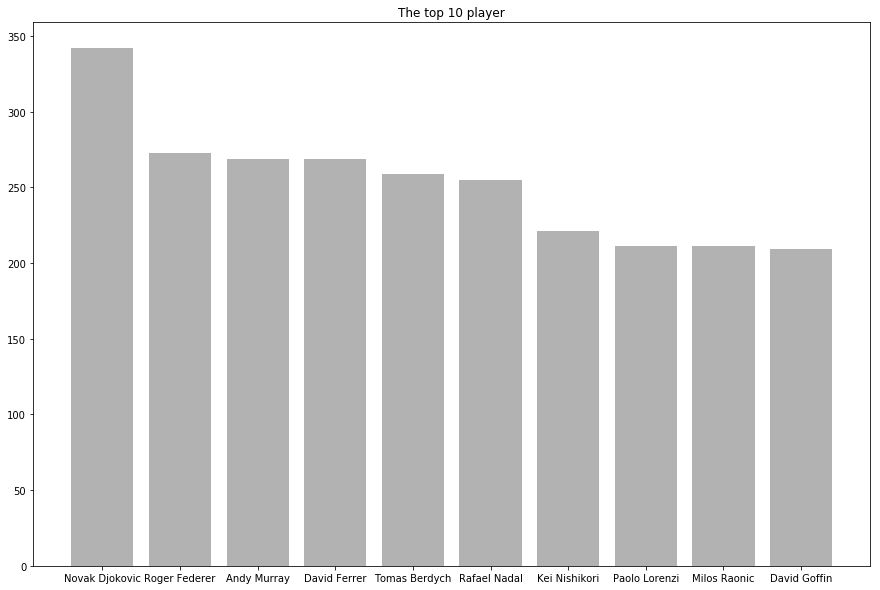

In [99]:
plt.figure(figsize=(15,10))
plt.bar(range(len(top10player)), top10player.values(), align='center', color = 'black',alpha= 0.3)
plt.xticks(range(len(top10player)), list(top10player.keys()))
plt.title("The top 10 player")
plt.show()

#### Correlation matrix for top 10 players

In [189]:
data_stats['top_ten'] = data_stats.ID1.apply(lambda x: x in top10player_list.index)

In [190]:
data_stats_top_ten = data_stats[data_stats.top_ten == True]

In [203]:
corr = data_stats_top_ten[['ID1','DF_1', 'TPW_1','ACES_1','W1SR_1', 'W2SR_1', 'FSR_1', 'BPR_1', 'RPWR_1','ID_R']].corr()

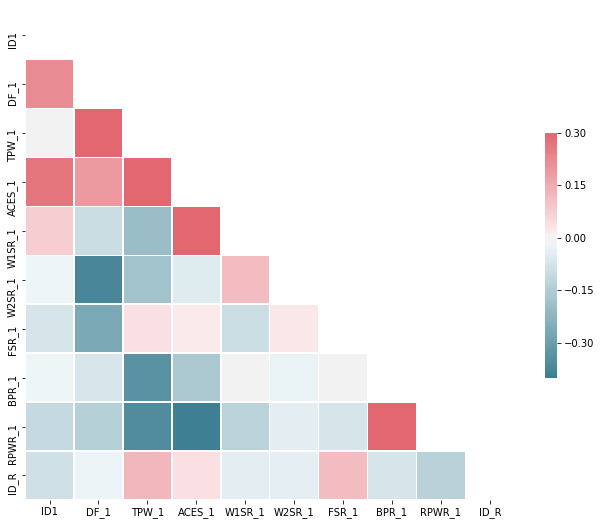

In [204]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In the graph there is some logical results and other that need to be reviewd, the winning rate is positively correlated to the number of Double faults is so strange, but for other metrics they are logicaly correlated :D.</br>
We notice that the winning rate is so correlated with number of aces, which means that the player wins easely the point and the match is not so challenging.</br>
Same thing goes for the other features

### top 3 Favorit tournements for the 10 top players

In [168]:
player_tournement = {}
for player_idx in top10player_list.index:
    player_name = data_players.NAME_P[data_players.ID_P == player_idx].iloc[0]
    player_tournement[player_name] = data_stats.ID_T[data_stats.ID1 == player_idx].value_counts().head(3)
    player_tournement[player_name].index = list(data_tour.NAME_T.iloc[player_tournement[player_name].index])

In [172]:
for player in player_tournement:
    print("Top 3 tournement for '{}'".format(player))
    print(player_tournement[player])
    print("\n")

Top 3 tournement for 'Novak Djokovic'
Davis Cup, Group II, PO, TUN-BLR 2-3    7
USA F14                                 7
Algeria F1                              7
Name: ID_T, dtype: int64


Top 3 tournement for 'Roger Federer'
Davis Cup, Group I, 2R, BRA-COL 3-1    7
Algeria F1                             6
France F9                              6
Name: ID_T, dtype: int64


Top 3 tournement for 'Andy Murray'
Davis Cup, Group II, PO, HKG-SRI 2-3    7
Mexico F2                               7
Great Britain F11                       7
Name: ID_T, dtype: int64


Top 3 tournement for 'David Ferrer'
Mexico F6                               6
Sweden F2                               5
Davis Cup, Group II, PO, HKG-SRI 2-3    5
Name: ID_T, dtype: int64


Top 3 tournement for 'Tomas Berdych'
France F9    5
Mexico F2    5
USA F12      5
Name: ID_T, dtype: int64


Top 3 tournement for 'Rafael Nadal'
Kazakhstan F5                          7
Davis Cup, Group I, 2R, NED-ROU 5-0    7
Mexico F6         

It is so clear that this dataset is so old as these players won lot of well known tournements </br> <font color="red">'NADAL' and 'Kazakhstan' so weird !!!!!</font>